# Model 2 
Trying to use more data from different data sets 

In [16]:
import pandas as pd
import numpy as np

import os
import sys
import re
from tqdm import tqdm
import timeit

#Libros for sound analysis
import librosa
import librosa.display 
import seaborn as sns
import matplotlib.pyplot as plt

#To play audio
import IPython.display as ipd
from IPython.display import Audio

import tensorflow as tf 

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 


## Create Data set

### TESS

In [11]:
#Function from previous attempts
def load_data(location: str):
    path = []
    labels = []
    for dirname, _, filenames in os.walk(location):
        for filename in filenames:
            path.append(os.path.join(dirname,filename))
            label = filename.split('_')[-1]
            label = label.split('.')[0]
            labels.append(label.lower())
    df = pd.DataFrame() 
    df['File'] = path
    df['Label'] = labels
    return df

In [7]:
data_location = './Data/TESS Toronto emotional speech set data/'

In [20]:
tess_df = load_data(data_location)

In [118]:
tess_df.loc[tess_df.Label=='ps','Label']='surprised'

In [119]:
tess_df.Label.value_counts()

Label
angry        400
disgust      400
fear         400
happy        400
neutral      400
surprised    400
sad          400
Name: count, dtype: int64

### RAVDESS

In [155]:
ravdess = "./Data/Ravdess/audio_speech_actors_01-24/"
ravdes_directory_list = os.listdir(ravdess)

In [156]:
ravdess_labels = []
ravdess_path = []
for i in ravdes_directory_list:
    actor = os.listdir(ravdess + i)
    for f in actor:
        part = f.split('.')[0].split('-')
        ravdess_labels.append(int(part[2]))
        ravdess_path.append(ravdess + i + '/'+ f)

In [157]:
print(ravdess_labels[0])
print(ravdess_path[0])

1
./Data/Ravdess/audio_speech_actors_01-24/Actor_01/03-01-01-01-01-01-01.wav


In [158]:
file_df = pd.DataFrame(ravdess_path,columns=['File'])
label_df = pd.DataFrame(ravdess_labels,columns=['Label'])
ravdess_df = pd.concat([file_df,label_df],axis=1)
ravdess_df

,File,Label
0,./Data/Ravdess/audio_speech_actors_01-24/Actor...,1
1,./Data/Ravdess/audio_speech_actors_01-24/Actor...,1
2,./Data/Ravdess/audio_speech_actors_01-24/Actor...,1
3,./Data/Ravdess/audio_speech_actors_01-24/Actor...,1
4,./Data/Ravdess/audio_speech_actors_01-24/Actor...,2
...,...,...
1435,./Data/Ravdess/audio_speech_actors_01-24/Actor...,8
1436,./Data/Ravdess/audio_speech_actors_01-24/Actor...,8
1437,./Data/Ravdess/audio_speech_actors_01-24/Actor...,8
1438,./Data/Ravdess/audio_speech_actors_01-24/Actor...,8


In [159]:
ravdess_df.Label.replace({
    1 :'neutral', 2 :'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprised'
},inplace=True)

In [160]:
ravdess_df.Label.value_counts()

Label
calm         192
happy        192
sad          192
angry        192
fear         192
disgust      192
surprised    192
neutral       96
Name: count, dtype: int64

In [139]:
ravdess_df

,File,Label
0,./Data/Ravdess/audio_speech_actors_01-24/Actor...,neutral
1,./Data/Ravdess/audio_speech_actors_01-24/Actor...,neutral
2,./Data/Ravdess/audio_speech_actors_01-24/Actor...,neutral
3,./Data/Ravdess/audio_speech_actors_01-24/Actor...,neutral
4,./Data/Ravdess/audio_speech_actors_01-24/Actor...,calm
...,...,...
1435,./Data/Ravdess/audio_speech_actors_01-24/Actor...,surprised
1436,./Data/Ravdess/audio_speech_actors_01-24/Actor...,surprised
1437,./Data/Ravdess/audio_speech_actors_01-24/Actor...,surprised
1438,./Data/Ravdess/audio_speech_actors_01-24/Actor...,surprised


### CREMA

In [162]:
crema = './Data/Crema/'
crema_dir = os.listdir(crema)

In [163]:
crema_file = []
crema_label = []

In [164]:
for file in crema_dir:
    crema_file.append(crema+file)
    part = file.split('_')
    l_label = part[2]
    match l_label:
        case 'SAD':
            crema_label.append('sad')
        case 'ANG':
            crema_label.append('angry')
        case 'DIS':
            crema_label.append('disgust')
        case 'FEA':
            crema_label.append('fear')
        case 'HAP':
            crema_label.append('happy')
        case 'NEU':
            crema_label.append('neutral')

In [165]:
crema_file_df = pd.DataFrame(crema_file,columns=['File'])
crema_label_df = pd.DataFrame(crema_label,columns=['Label'])
crema_df = pd.concat([crema_file_df,crema_label_df],axis=1)

In [166]:
crema_df.Label.value_counts()

Label
angry      1271
disgust    1271
fear       1271
happy      1271
sad        1271
neutral    1087
Name: count, dtype: int64

### Savee

In [167]:
savee = './Data/Savee/'
savee_dir = os.listdir(savee)

In [168]:
savee_file = []
savee_label = []

In [169]:
for file in savee_dir:
    savee_file.append(savee+file)
    part = file.split('_')[1].split('.')
    s_label = re.sub('[^a-z]','',part[0])
    match s_label:
        case 'a':
            savee_label.append('angry')
        case 'd':
            savee_label.append('disgust')
        case 'f':
            savee_label.append('fear')
        case 'h':
            savee_label.append('happy')
        case 'n':
            savee_label.append('neutral')
        case 'sa':
            savee_label.append('sad')
        case 'su':
            savee_label.append('surprised')

In [170]:
savee_file_df = pd.DataFrame(savee_file,columns=['File'])
savee_label_df = pd.DataFrame(savee_label,columns=['Label'])
savee_df = pd.concat([savee_file_df,savee_label_df],axis=1)

In [171]:
savee_df.Label.value_counts()

Label
neutral      120
angry         60
disgust       60
fear          60
happy         60
sad           60
surprised     60
Name: count, dtype: int64

### Concat datasets

In [172]:
data_sets = pd.concat([tess_df,ravdess_df,crema_df,savee_df],axis=0)

In [173]:
data = data_sets.reset_index(drop=True)

In [174]:
data.Label.value_counts()

Label
angry        1923
disgust      1923
fear         1923
happy        1923
sad          1923
neutral      1703
surprised     652
calm          192
Name: count, dtype: int64

In [177]:
data.shape

(12162, 2)

In [178]:
data.to_csv('./Data/datset1.csv',index=False)

## Load data and Explore data

In [2]:
speach_data = pd.read_csv('./Data/datset1.csv')
speach_data

,File,Label
0,./Data/TESS Toronto emotional speech set data/...,angry
1,./Data/TESS Toronto emotional speech set data/...,angry
2,./Data/TESS Toronto emotional speech set data/...,angry
3,./Data/TESS Toronto emotional speech set data/...,angry
4,./Data/TESS Toronto emotional speech set data/...,angry
...,...,...
12157,./Data/Savee/KL_su11.wav,surprised
12158,./Data/Savee/KL_su12.wav,surprised
12159,./Data/Savee/KL_su13.wav,surprised
12160,./Data/Savee/KL_su14.wav,surprised


<Axes: xlabel='Label', ylabel='count'>

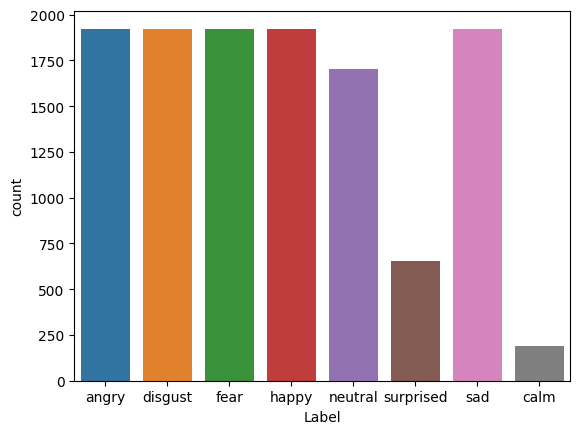

In [3]:
sns.countplot(speach_data,x='Label')

In [4]:
def waveplot(data, sample_rate, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion,size=14)
    librosa.display.waveshow(data,sr=sample_rate)
    plt.show()

def spectogram(data, sample_rate,emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(10,4))
    plt.title(emotion,size=14)
    librosa.display.specshow(xdb,sr=sample_rate,x_axis='time',y_axis='hz')
    plt.colorbar()
    plt.show()

def plot_waveplot_and_spectogram(data,emotion):
    path = np.array(data['File'][data['Label'] == emotion])[0]
    data,sample_rate = librosa.load(path)
    waveplot(data,sample_rate,emotion)
    spectogram(data,sample_rate,emotion)

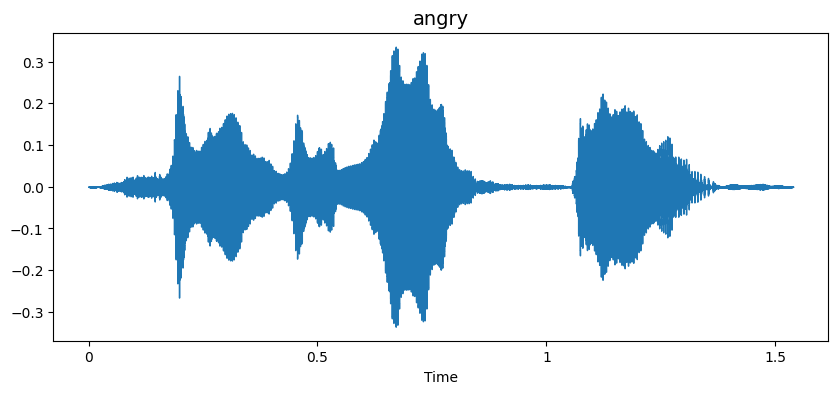

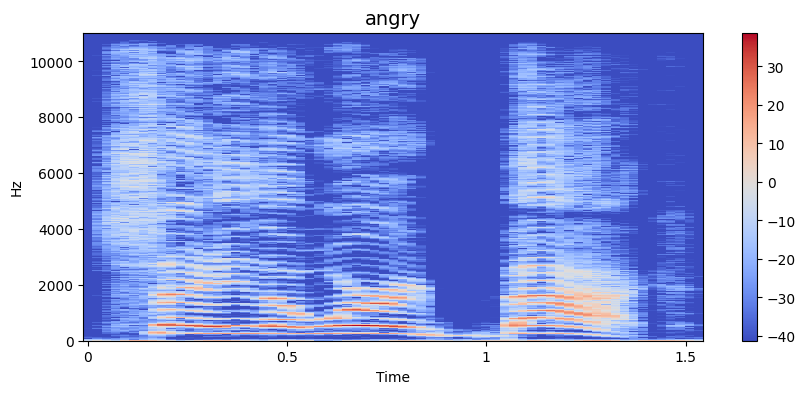

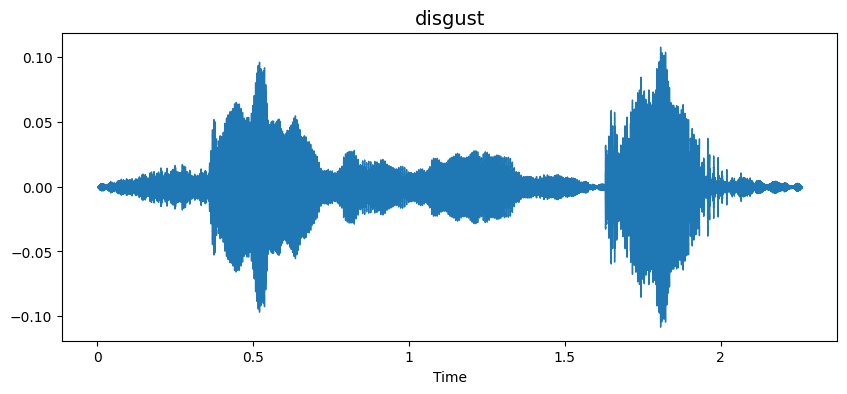

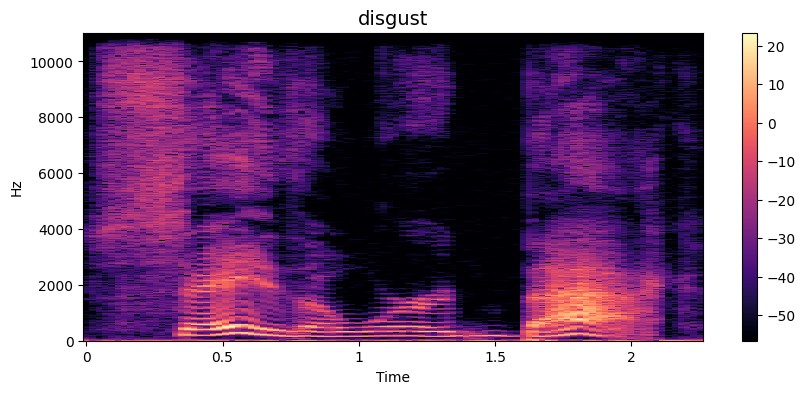

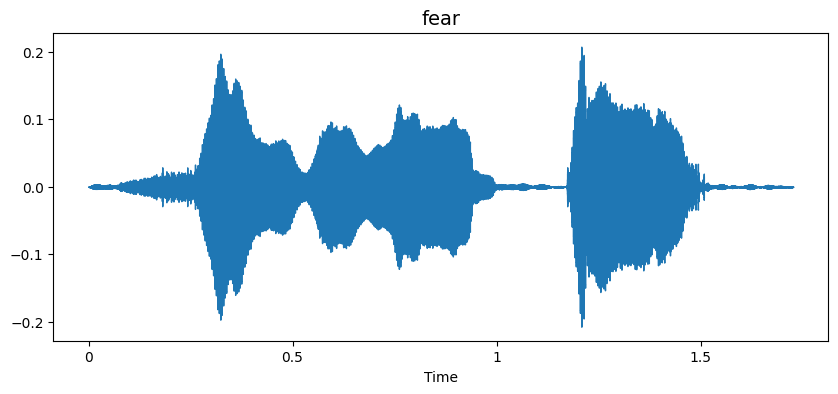

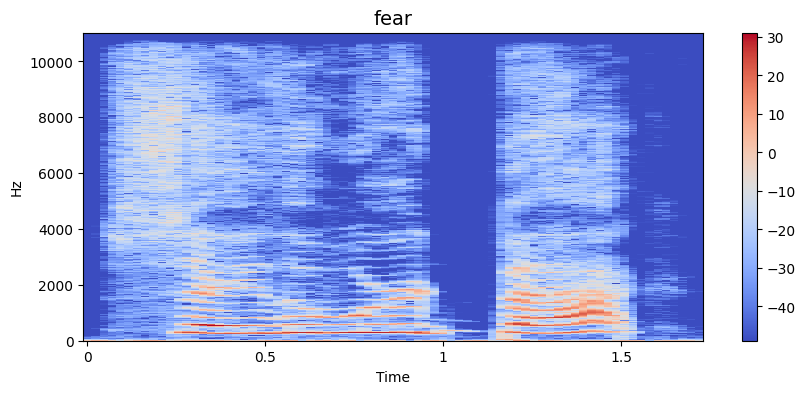

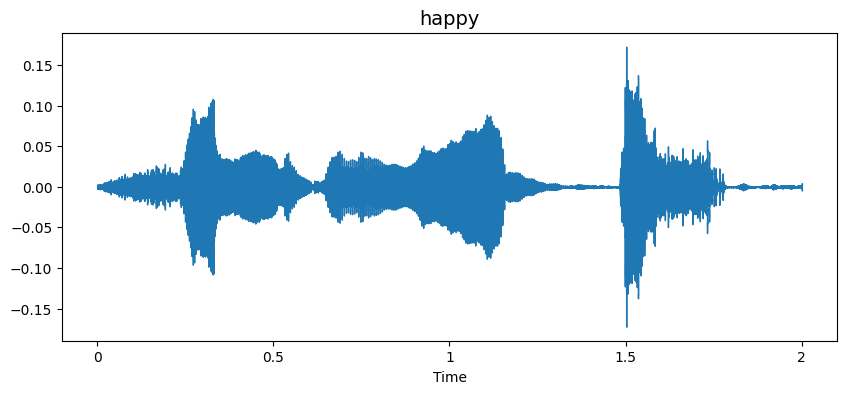

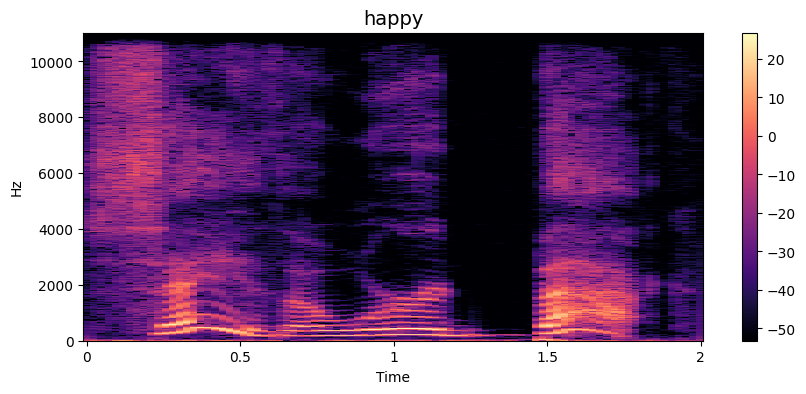

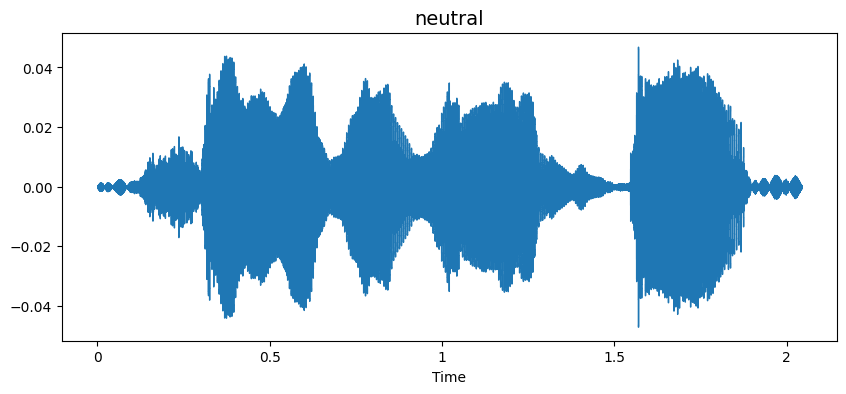

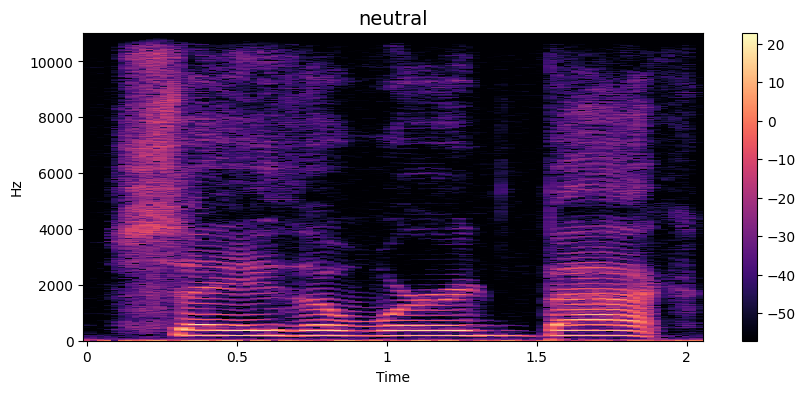

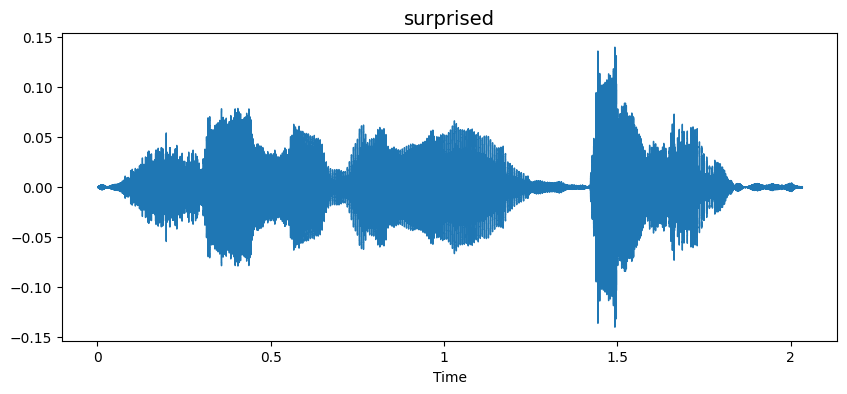

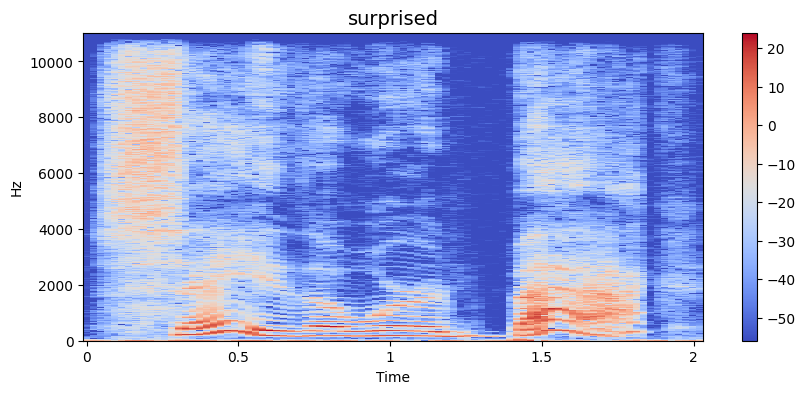

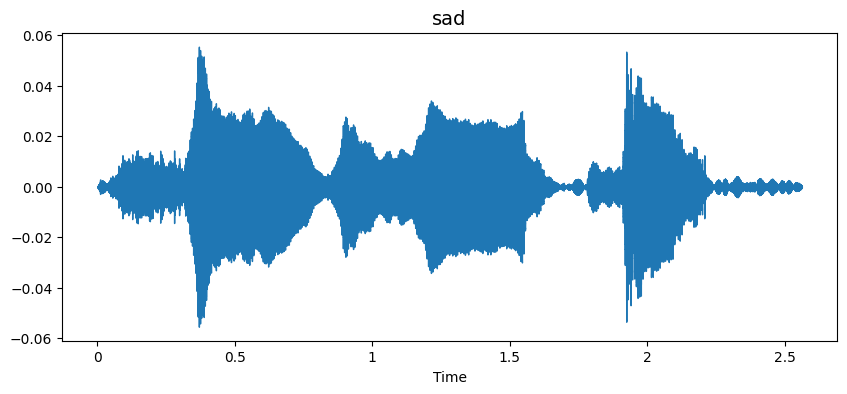

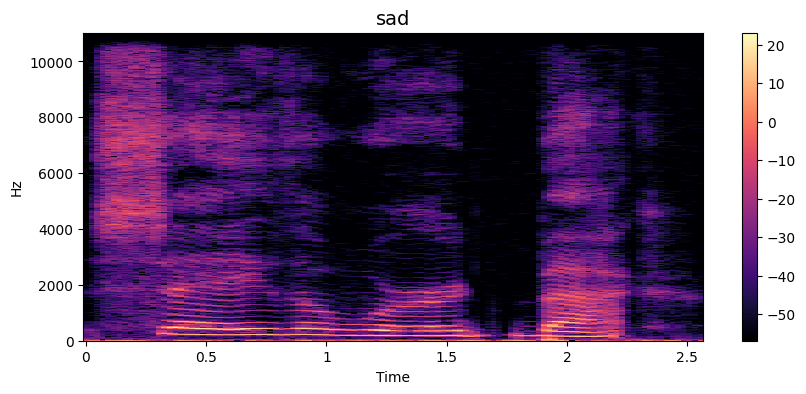

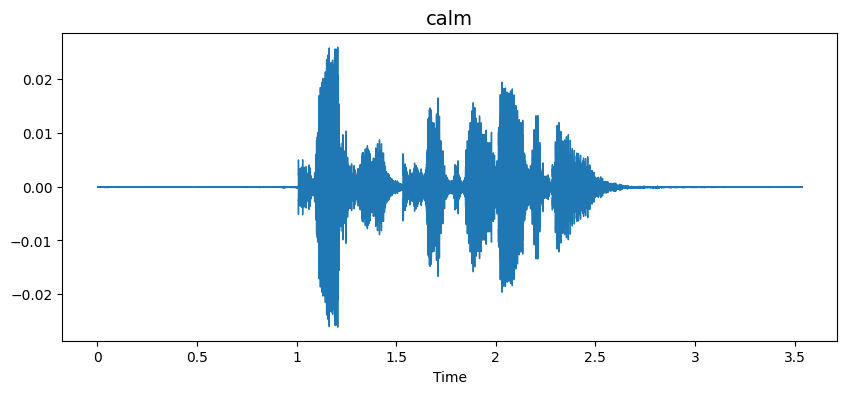

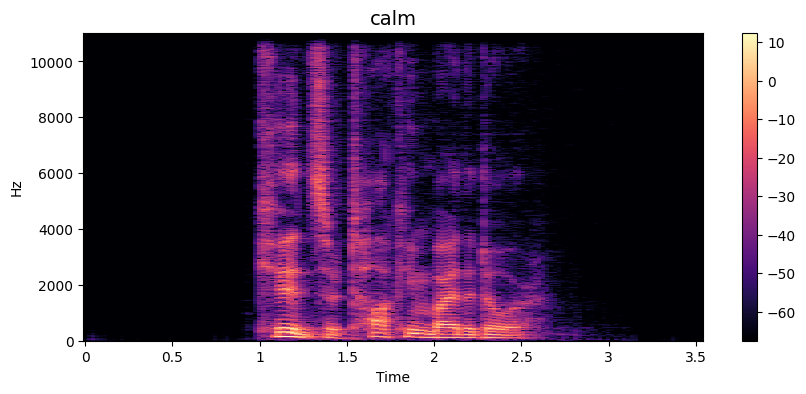

In [5]:
labels_to_plot = pd.unique(speach_data['Label'])
for l in labels_to_plot:
    plot_waveplot_and_spectogram(speach_data,l)

## Feature Extraction

In [45]:
def zcr(data,frame_lenght,hop_lenght):
    zcr = librosa.feature.zero_crossing_rate(data,frame_length=frame_lenght,hop_length=hop_lenght)
    return np.squeeze(zcr)

def rmse(data,frame_length=2048,hop_length=512):
    rmse = librosa.feature.rms(y=data,frame_length=frame_length,hop_length=hop_length)
    return np.squeeze(rmse)

def mfcc(data,sr,frame_length=2048,hop_length=512,flatten:bool=True):
    mfcc =  librosa.feature.mfcc(y=data,sr=sr)
    return np.squeeze(mfcc.T) if not flatten else np.ravel(mfcc.T)

In [40]:
def extract_feature(data,sr = 22050,frame_length=2048,hop_length=512):
    result = np.array([])
    
    result = np.hstack((result,
                       zcr(data,frame_length,hop_length),
                       rmse(data,frame_length,hop_length),
                       mfcc(data,sr,frame_length,hop_length)
                       ))
    
    return result

In [41]:
def get_feature(path,duration=2.5, offset=0.6):
    data,sr=librosa.load(path,duration=duration,offset=offset)
    aud=extract_feature(data)
    audio=np.array(aud)
    audio=np.vstack((audio,aud4))
    
    return audio

In [55]:
start = timeit.default_timer()
X,Y=[],[]
for path,emotion,index in tqdm (zip(speach_data.File,speach_data.Label,range(speach_data.File.shape[0]))):
    features=get_feature(path)
    if index%500==0:
        print(f'{index} audio has been processed')
    X.append(features)
    Y.append(emotion)
print('Done')
stop = timeit.default_timer()

print('Time: ', stop - start)  

25it [00:00, 121.30it/s]

0 audio has been processed


521it [00:04, 116.88it/s]

500 audio has been processed


1011it [00:10, 100.99it/s]

1000 audio has been processed


1514it [00:15, 94.77it/s] 

1500 audio has been processed


2019it [00:21, 103.59it/s]

2000 audio has been processed


2503it [00:26, 103.70it/s]

2500 audio has been processed


3015it [00:32, 72.33it/s] 

3000 audio has been processed


3515it [00:39, 71.39it/s]

3500 audio has been processed


4009it [00:46, 74.60it/s]

4000 audio has been processed


4513it [00:53, 60.98it/s]

4500 audio has been processed


5014it [00:59, 83.00it/s]

5000 audio has been processed


5513it [01:05, 83.09it/s]

5500 audio has been processed


6013it [01:10, 79.76it/s]

6000 audio has been processed


6514it [01:16, 80.46it/s]

6500 audio has been processed


7007it [01:23, 65.95it/s]

7000 audio has been processed


7516it [01:29, 88.41it/s]

7500 audio has been processed


8010it [01:34, 100.94it/s]

8000 audio has been processed


8515it [01:41, 82.94it/s] 

8500 audio has been processed


9015it [01:46, 88.37it/s]

9000 audio has been processed


9509it [01:52, 90.82it/s]

9500 audio has been processed


10014it [01:58, 85.51it/s]

10000 audio has been processed


10514it [02:04, 89.80it/s]

10500 audio has been processed


11015it [02:09, 83.25it/s]

11000 audio has been processed


11515it [02:15, 84.90it/s]

11500 audio has been processed


12011it [02:21, 78.71it/s]

12000 audio has been processed


12162it [02:23, 84.73it/s]

Done
Time:  143.53948769997805


In [56]:
Emotions = pd.DataFrame(X)

In [57]:
Emotions['Emotions'] = Y

In [59]:
Emotions.isnull().sum()

0              0
1              0
2              0
3              0
4              0
            ... 
2372        9406
2373        9406
2374        9406
2375        9406
Emotions       0
Length: 2377, dtype: int64